# Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [ ]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])


**Response 3** Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [ ]:
path='/content/drive/MyDrive/Waterloo/Assignment4: Classification/iris.data'
#df=pd.read_csv(path)
data=pd.read_csv(path,header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

**Response 4** Data inspection.

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [ ]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
#data = sns.load_dataset("data")

###  scatter plots - sepal_width vs sepal_length

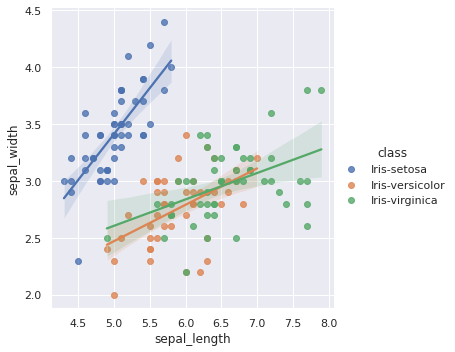

In [ ]:
g1= sns.lmplot(x="sepal_length", y="sepal_width", hue="class", data=data)

###  scatter plots - sepal_width vs sepal_length and petal_width vs petal_length

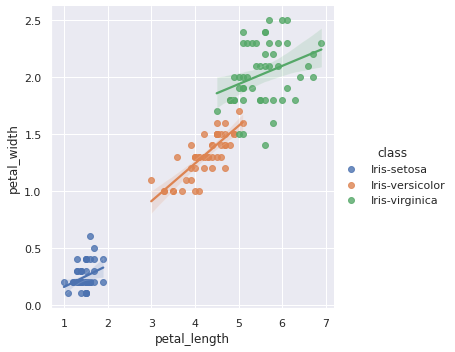

In [ ]:
g2 = sns.lmplot(x="petal_length", y="petal_width", hue="class", data=data)

**Response 5**  Prepare the data for classification

In [ ]:
print(data.columns.to_list())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


Classification: Select X and y

In [ ]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data["class"]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


**Response 6** Split the data

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #sklearn train_test_split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**Response 7** Run the fit using KNeighborsClassifier from sklearn.neighbors.


*   First, instantiate the model,
*  Then, run the classifier on the training set.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**Response 8** learning model to predict the class from features,

Use learning model to predict the class from features, run prediction on X from test part.

Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).

In [ ]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [ ]:
# pro way:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


count the numbers of correct predictions and predictions that were wrong

In [ ]:
y_test.value_counts()

Iris-setosa        13
Iris-virginica     13
Iris-versicolor     4
Name: class, dtype: int64

In [ ]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.43333333333333335

**Response 9**  In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:

Generate 10 random train/test splits for each value of k
Fit the model for each split and generate predictions
Average the accuracy score for each k
Calculate the average number of correct predictions for each k as well
Plot the accuracy score for different values of k. What conclusion can you make based on the graph?

In [ ]:
from sklearn import metrics
#Try running from k=1 until 50 and record testing accuracy
lst = [1,3, 5, 7, 10, 20, 30, 40, 50]
#k_range = range(len(lst))
scores = {}
scores_list = []
for k in lst:   #range(len(lst))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.9666666666666667,
 3: 1.0,
 5: 1.0,
 7: 1.0,
 10: 0.9666666666666667,
 20: 0.9333333333333333,
 30: 0.8333333333333334,
 40: 0.8,
 50: 0.8}

Text(0, 0.5, 'Testing Accuracy')

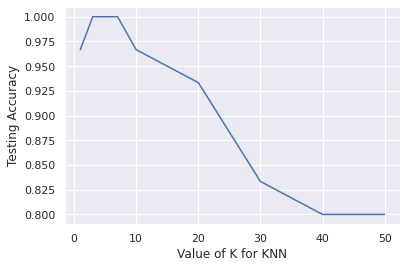

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(lst,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Conclusion** from the graph we can deduce that the ideal number to choose for k is less than or equal to 3 otherwise the precision starts to decrease